# EDA-Project


1. Проверить корреляцию между параметрами и выявить основные взаимосвязи.
2. Найти основные параметры влияющие на итоговую стоимость жилья.
3. Проверить соотношение количества комнат, парковочных мест, допускаются ли животные и наличие мебели.
4. Провести анализ полученных данных и определить основные параметры влияющие на итоговую стоимость.

In [244]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
print(os.listdir())

['.ipynb_checkpoints', 'eda-project-2.ipynb', 'houses_to_rent.csv']


In [262]:
data = pd.read_csv('houses_to_rent.csv')
data.head(10)

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
5,5,1,13,1,1,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"
6,6,1,55,1,1,1,2,acept,furnished,"R$1,950","R$5,000",R$375,R$64,"R$7,389"
7,7,1,55,2,2,1,2,acept,not furnished,R$600,"R$1,300",R$67,R$17,"R$1,984"
8,8,1,82,3,1,1,3,acept,furnished,R$828,"R$2,000",R$109,R$26,"R$2,963"
9,9,1,32,1,1,1,16,acept,not furnished,R$533,"R$2,900",R$0,R$37,"R$3,470"


In [263]:
data.columns

Index(['Unnamed: 0', 'city', 'area', 'rooms', 'bathroom', 'parking spaces',
       'floor', 'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   object
 11  property tax    6080 non-null   object
 12  fire insurance  6080 non-null   object
 13  total           6080 non-null   object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [354]:
def del_rate(data, columns=[], rate='$'): # Функция для преобразования данных в числовой формат в которых присутствует знак валюты
    for col in columns:
        data[col] = data[col].apply(lambda x:x.replace(rate,'').replace(',',''))
        data[col] = pd.to_numeric(data[col],errors='coerce')
        data[col] = data[col].replace(np.nan, 0, regex=True)
        data[col] = data[col].astype(int)
    return data

In [266]:
data.drop(data.columns[0], axis=1, inplace=True)

data = data.drop_duplicates()
data.loc[data['floor']=='-', ['floor']]=0
data['floor'] = data['floor'].astype('int64')

data['animal'] = data['animal'].map({'acept':1, 'not acept':0}).astype('int64')

data['furniture'] = data['furniture'].map({'furnished':1, 'not furnished':0}).astype('int64')

del_rate(data, ['hoa', 'rent amount', 'property tax', 'fire insurance', 'total'], rate = 'R$')


['hoa', 'rent amount', 'property tax', 'fire insurance', 'total']


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,1,19,1,1,0,0,0,0,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,1,0,420,1150,0,15,1585
6076,1,84,2,2,1,16,0,1,768,2900,63,37,3768
6077,0,48,1,1,0,13,1,0,250,950,42,13,1255
6078,1,160,3,2,2,0,0,0,0,3500,250,53,3803


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5882 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            5882 non-null   int64
 1   area            5882 non-null   int64
 2   rooms           5882 non-null   int64
 3   bathroom        5882 non-null   int64
 4   parking spaces  5882 non-null   int64
 5   floor           5882 non-null   int64
 6   animal          5882 non-null   int64
 7   furniture       5882 non-null   int64
 8   hoa             5882 non-null   int32
 9   rent amount     5882 non-null   int32
 10  property tax    5882 non-null   int32
 11  fire insurance  5882 non-null   int32
 12  total           5882 non-null   int32
dtypes: int32(5), int64(8)
memory usage: 528.5 KB


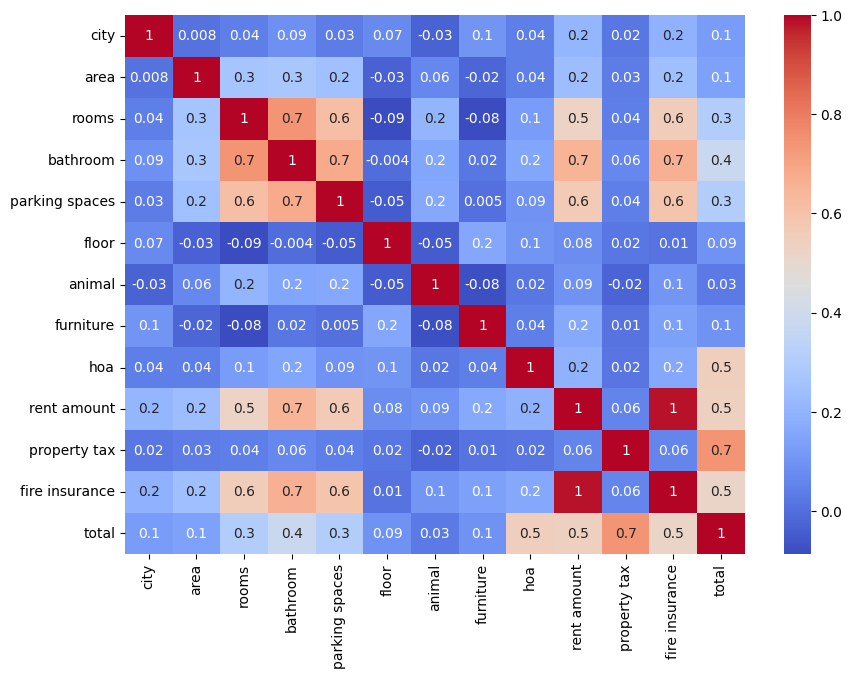

In [281]:
g = plt.rcParams["figure.figsize"] = (10,7)
g = sns.heatmap(data=data.corr(), fmt='.01g', annot=True, cmap='coolwarm')
g.set_xticklabels(g.get_xticklabels(),rotation=90);

Наблюдается сильная корреляция между 'bathroom' и 'rooms', 'parking spaces' и 'rooms', 'parking spaces' и 'barhroom'
По полученным данным из графика корреляции видно что основные факторы которые влияют на окончательную цену аренды это 'hoa', 'rent amount', 'property tax', 'fire insurance'). Стоимость за 'fire insurance' напрямую связанна с колличеством 'rooms', 'bathroom' и 'parking spaces'.

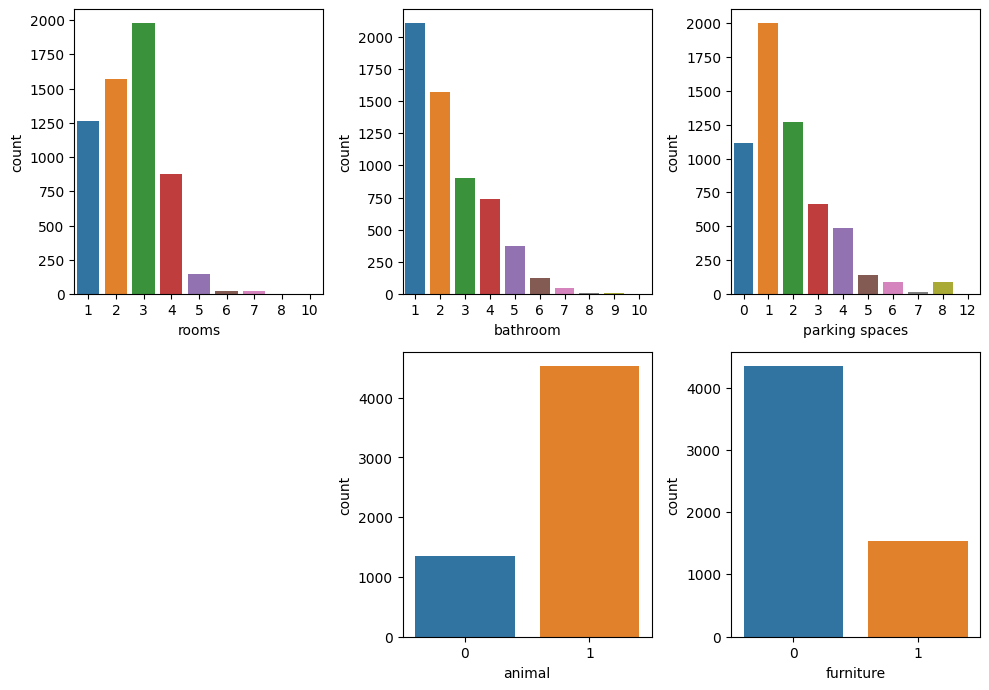

In [108]:
f = plt.figure(figsize=(10,10))
gs = f.add_gridspec(3, 3)

ax = f.add_subplot(gs[0, 0])
ax = sns.countplot(x="rooms", data=data)

ax = f.add_subplot(gs[0, 1])
ax = sns.countplot(x="bathroom", data=data)

ax = f.add_subplot(gs[0, 2])
ax = sns.countplot(x="parking spaces", data=data)

ax = f.add_subplot(gs[1, 1])
ax = sns.countplot(x="animal", data=data)

ax = f.add_subplot(gs[1, 2])
ax = sns.countplot(x="furniture", data=data)

f.tight_layout()

Исходя из графиков видно что больше всего сдаются квартиры(дома) имеющие 3 комнаты(не включая ванную комнату), большая часть жилья имеет хотябы одно парковочное место, весомая часть арендадателей разрешают проживание с животными, а так же большая часть жилья сдается без мебели.

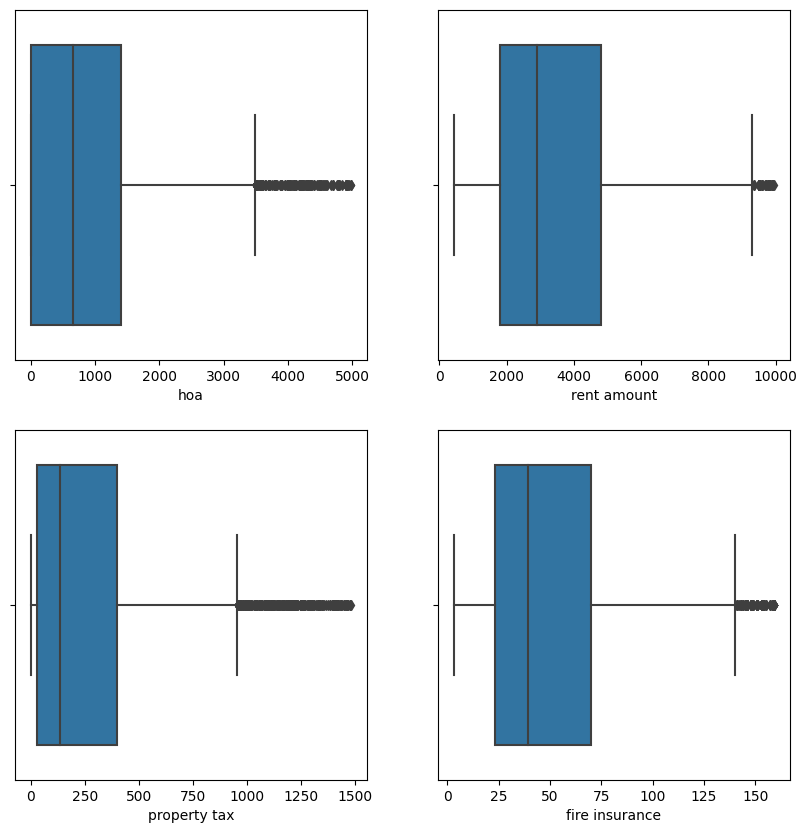

In [306]:
f = plt.figure(figsize=(10,10))
gs = f.add_gridspec(2, 2)

ax = f.add_subplot(gs[0, 0])
ax = sns.boxplot(x=data["hoa"].loc[data["hoa"]<5000])

ax = f.add_subplot(gs[0, 1])
ax = sns.boxplot(x=data["rent amount"].loc[data["rent amount"]<10000])

ax = f.add_subplot(gs[1, 0])
ax = sns.boxplot(x=data["property tax"].loc[data["property tax"]<1500])

ax = f.add_subplot(gs[1, 1])
ax = sns.boxplot(x=data["fire insurance"].loc[data["fire insurance"]<160])

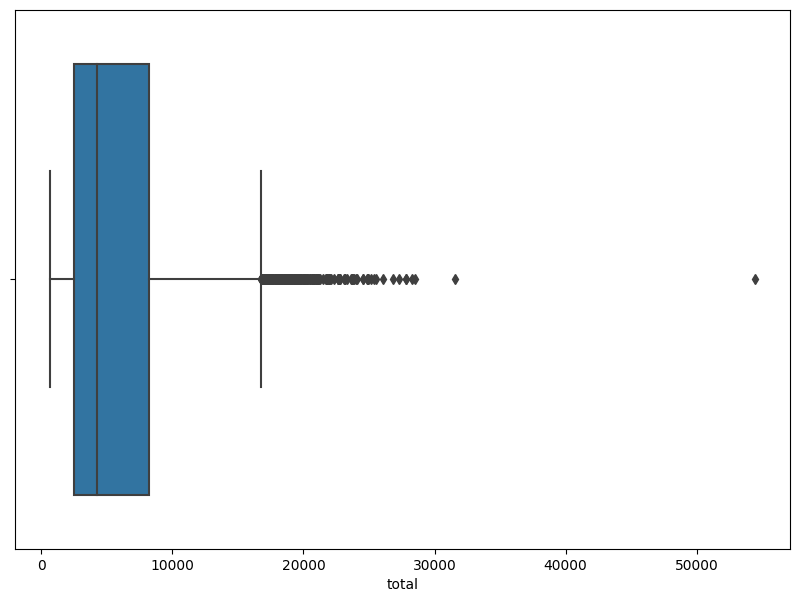

In [311]:
sns.boxplot(x=data["total"].loc[data["total"]<200000]);

In [353]:
median = data[['hoa', 'rent amount','property tax', 'fire insurance', 'total']]. median ()
mean = data[['hoa', 'rent amount','property tax', 'fire insurance', 'total']]. mean ()
print(median)
print('''-------------''')
print(mean)

hoa                670.0
rent amount       3200.0
property tax       155.0
fire insurance      42.0
total             4247.0
dtype: float64
-------------
hoa               1106.785787
rent amount       4479.392724
property tax       504.324719
fire insurance      59.316049
total             6150.218293
dtype: float64


Весомую долю итоговой платы занимает Товарищество собственников жилья(hoa).

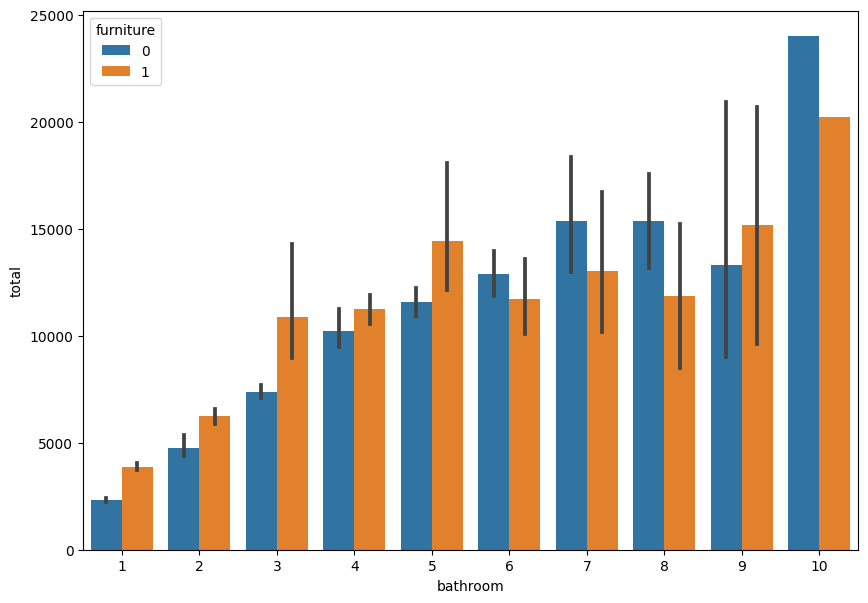

In [330]:
g = sns.barplot(x='bathroom', y='total', hue='furniture', data=data)


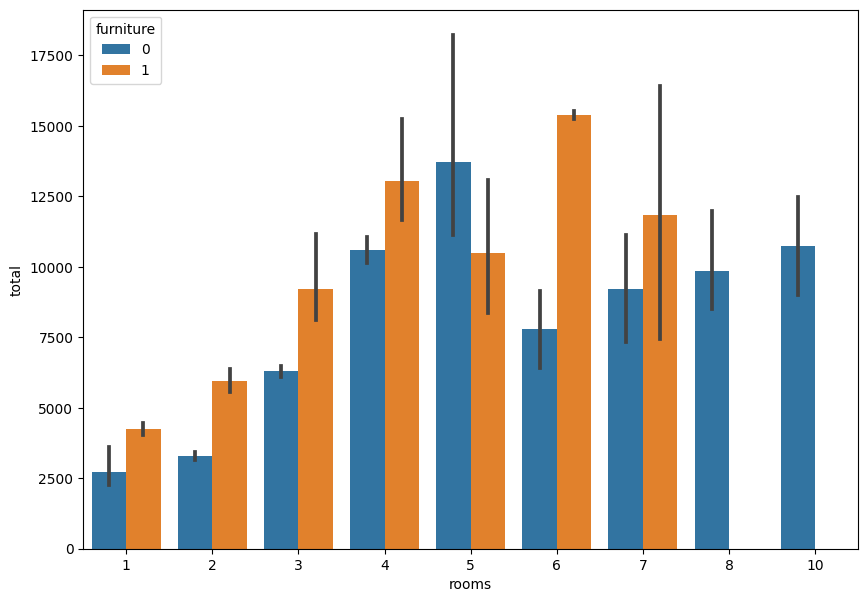

In [329]:
g = sns.barplot(x='rooms', y='total', hue='furniture', data=data)

Из данных графиков можно сделать вывод что квартиты которые сдаются с мебелью обхлдятся дороже нежели без нее.

Вывод: Основные параметры влияющие на стоимость аренды это колличество комнат, наличие мебели, стоимость налога на имущество и наличие парковочного места а так же плата за Товарищество собственников жилья.
    